# **La Ramona - Spotify Growth**

## **Exploratory Data Analysis**

### **Imports and data loading**


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import plotly.express as px 
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

#### Daily Total Audience Data

Firstly, we have an Audience.csv which contains total daily streams, listeners & follower count. 
We can explore this to get a good idea of overall performance over time.

In [20]:
df_audience = pd.read_csv("Data/audience.csv")
df_audience['date']= pd.to_datetime(df_audience['date'])
df_audience = df_audience.set_index('date')

#### Time Series Function
Building a function to plot our various data points over time, Time Series Vizualisations will be particularly useful to monitor performance over time.

In [91]:
def build_daily_timeseries(df, title, y_label, start_date='2023-01-01', resample_period='D'):

    df = df[df.index>start_date]
    if resample_period != 'D':
        df = df.resample(resample_period).last()  # or .mean()/.sum()

    
    plt.figure(figsize=(12, 6))    
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
    
    plt.xticks(rotation=45)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

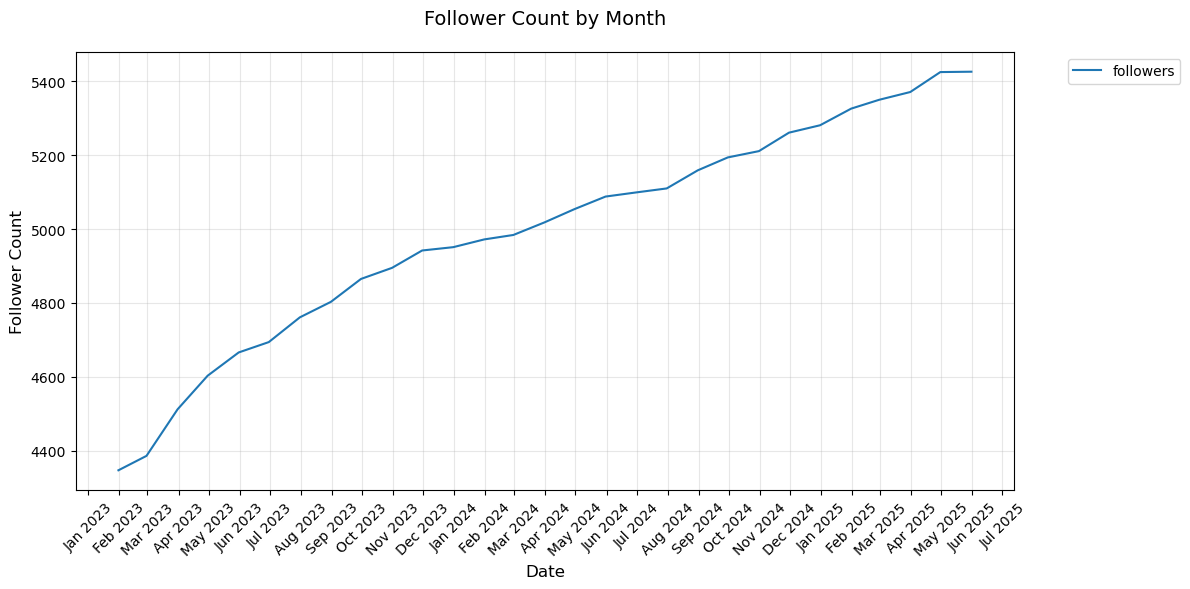

In [93]:
# For social media metrics like follower counts over time, it often makes sense to resample to a weekly cadence.
build_daily_timeseries(df_audience[['followers']], 'Follower Count by Month', 'Follower Count',resample_period='ME')

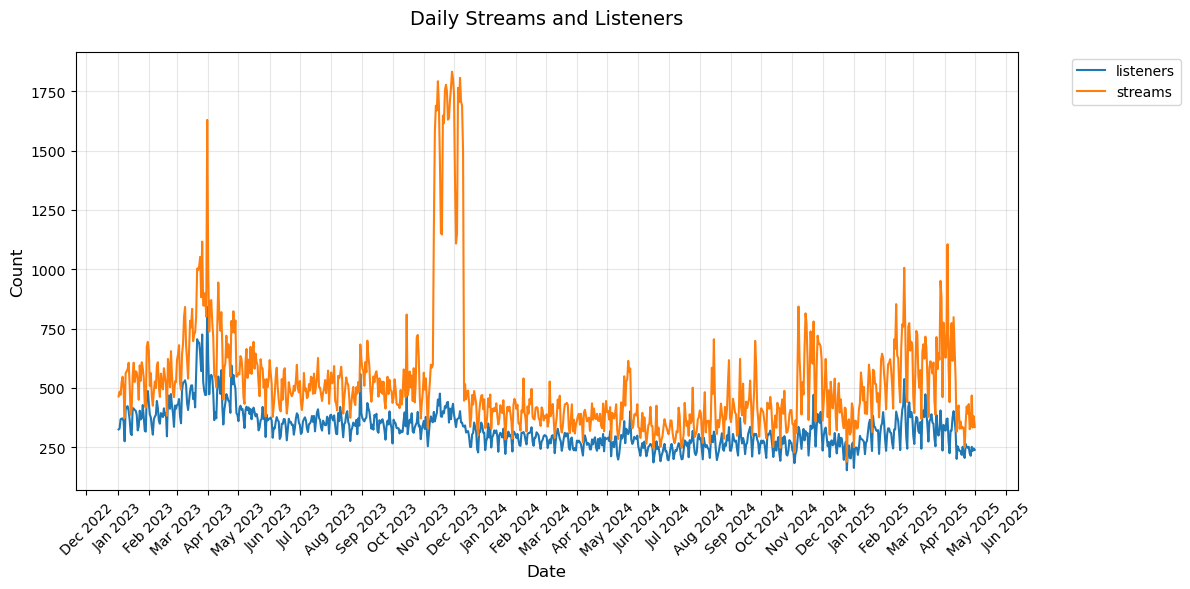

In [95]:
build_daily_timeseries(df_audience[['listeners', 'streams']], 'Daily Streams and Listeners', 'Count')

#### Dates with the highest total Streams

In [137]:
(df_audience.resample('W')
.agg({'streams': 'sum'})
.rename(columns={'streams': 'weekly_streams'})
.sort_values('weekly_streams', ascending=False)
.head(10)
)

,weekly_streams
date,
2023-11-26,11806
2023-12-03,11325
2023-12-10,11316
2023-11-19,10604
2023-03-26,6862
2023-04-02,6748
2023-11-12,5508
2023-03-19,5193
2023-04-16,5191


#### Insights

The followers have grown by ~1000 over the past 2.5yrs, There was shareper growth in 2023 and the slop has flattened out since then only 300 new followers in the last 12 months, this is an area that can definitely improve.

A `Listener` is a user and `Streams` is the total count of how many times a song is played, the chart appears correct where the Stream count is always greater than Listener count.

As you can see there is a really high spike in March and November 2023, will research the cause behind this spike. Since then, streams and listener count have been fairly steady throughout 2024, with a spike in November which coincided with a new Album being released. Also steams spiked in Feb and April 2025, around this time Ramona was performing in Colombia's largest festival and was getting a lot of traction in shared Social Media posts.

In [375]:
df_topten = pd.read_csv("Data/top_ten_dailystreams.csv")
df_topten['date']= pd.to_datetime(df_topten['date'])
df_topten = df_topten.set_index('date')

df_topten_2025 = df_topten[df_topten.index>'2025-01-01']

In [377]:
df_topten_2025.describe()

,Biutiful,Brio,Cherokee,Lo Que Nadie Pudo,Nunca Me Olvides,Quien Contra El Amor,Quier Sentirlo Otra Vez,Se Acabo el Amor,Senorita Ley D,Te Tengo y No Te Tengo,Temporal
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,22.375000,88.775000,46.658333,9.000000,36.725000,48.150000,27.808333,52.116667,87.483333,39.375000,11.266667
std,4.979053,16.063144,9.251387,3.559813,26.584877,31.486865,16.441031,22.994769,52.714386,8.176686,10.650864
min,11.000000,59.000000,29.000000,3.000000,3.000000,5.000000,5.000000,18.000000,6.000000,15.000000,1.000000
25%,19.750000,76.750000,40.000000,7.000000,13.750000,19.000000,16.000000,35.750000,50.750000,34.000000,5.000000
50%,22.000000,85.000000,47.000000,8.000000,27.500000,43.000000,24.000000,49.500000,83.000000,39.000000,9.000000
75%,26.000000,97.250000,53.000000,11.000000,57.000000,71.500000,36.250000,65.250000,119.500000,44.250000,14.000000
max,36.000000,142.000000,73.000000,25.000000,126.000000,138.000000,109.000000,126.000000,287.000000,58.000000,88.000000


In [ ]:
plt.figure(figsize=(10, 4))
x = df_topten.index
y = df_topten['Total Streams']
plt.plot(x,y, color='purple', linewidth=2)
plt.title('Total Daily Streams')
plt.xlabel('Date')

plt.ylabel('Total Streams')
plt.grid(alpha=0.3)
plt.show()

In [379]:
df_topten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2025-05-01 to 2024-01-01
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Biutiful                 487 non-null    int64
 1   Brio                     487 non-null    int64
 2   Cherokee                 487 non-null    int64
 3   Lo Que Nadie Pudo        487 non-null    int64
 4   Nunca Me Olvides         487 non-null    int64
 5   Quien Contra El Amor     487 non-null    int64
 6   Quier Sentirlo Otra Vez  487 non-null    int64
 7   Se Acabo el Amor         487 non-null    int64
 8   Senorita Ley D           487 non-null    int64
 9   Te Tengo y No Te Tengo   487 non-null    int64
 10  Temporal                 487 non-null    int64
dtypes: int64(11)
memory usage: 45.7 KB


### Visualise Streams by Song over Time

It makes sense to look back over different windows as some of the releases came out around 7 months ago, therefore don't fit the full period visualisations from the beginning of the dataset `2024-01-01` .

#### Full Period

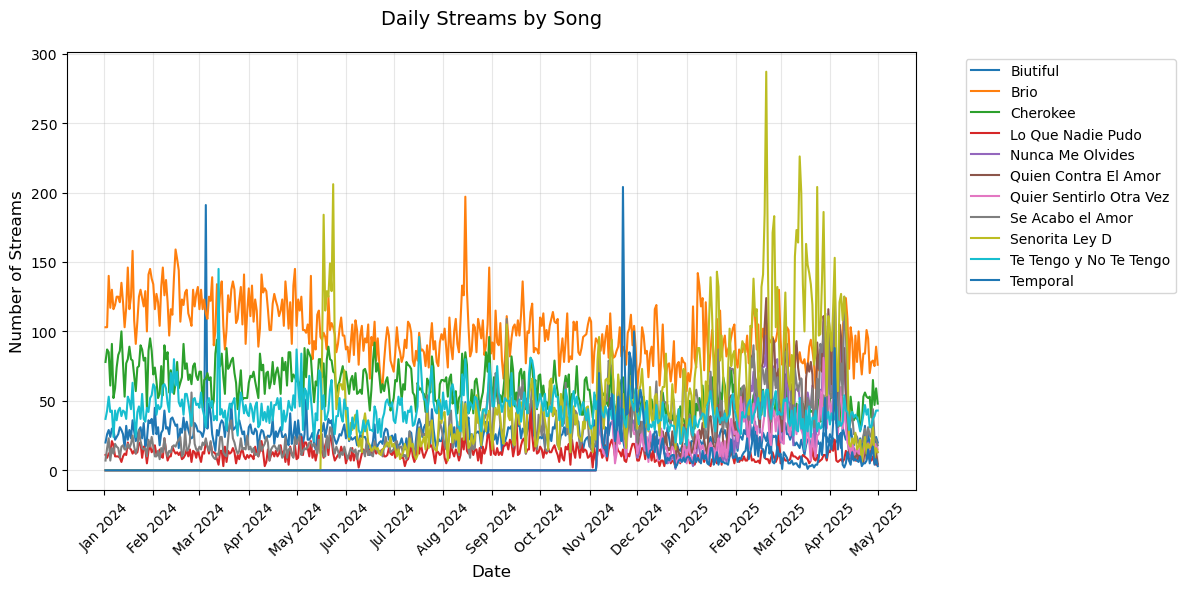

In [385]:
build_daily_timeseries(df_topten, '2024-01-01')

#### From start of 2025

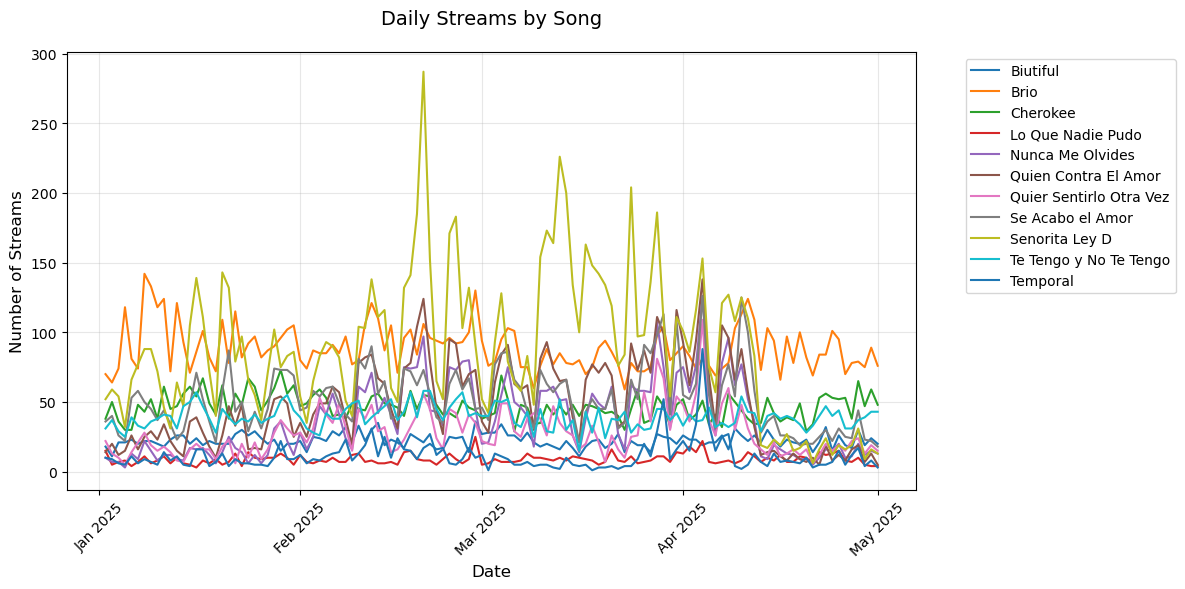

In [388]:
build_daily_timeseries(df_topten, '2025-01-01')

#### Insights

It would appear there were spikes in Feb and May of 2024 and March and April of 2025.

`Señorita Ley D` is the best performing song, whilst some of the older songs like `Temporal` and `No Te Tengo` perform consistently well across the year.

When looking into the highest Streams by Date, it also mirrors the visualisation, with mid February & late March/ early April being days with the highest streams.

date
2025-04-04    950
2025-02-20    902
2025-03-28    847
2025-03-29    746
2025-02-12    714
2025-04-10    710
2025-03-31    685
2025-02-25    684
2025-02-19    677
2025-02-24    677
Name: Total Streams, dtype: int64

In [ ]:
#### Insights

When looking at the `Total Streams` the line is very spiky, it would be good to understand why it goes up and down so much and how we can retain the stream count to remain consistently high.

Something to consider when we pull in Social Media Activity.

#### Geographic Analysis

In [ ]:
df_geog

#### Ideas

- The top 10 highest days of streams.
- similar artists to her in cities where she is popular.
- look at the geographic following of instagram & spotify - correlated? 
- see if theres a link between instagram posts and spotify
- analyse the SEO of spotify
- find the  Audio Analysis of the top tracks, find similar songs from other artists.
- find playlists which contain songs with a similar structure and musical content, including rhythm, pitch, and timbre.
- understand the audience tastes, what else do they listen to.
- Once we have identified the genres Ramonas song best fit into, then find out the characteristics of the popular songs in that Genre.
- conduct Principal component analysis (PCA) on all the features of each of the songs (Acousticness, danceability, energy, duration, instrumentals, valence, popularity, tempo, and speechines) and find the features of the songs that group well together. - Use these to find good collaborations. ref (https://github.com/datares/TeamPink )


### Stats:

#### Regression Model: Quantifying Impact Factors
A multiple linear regression (or logistic regression for binary outcomes) can help you determine which factors most influence stream growth.

Example Model:


 | Factor Type          | Example Metrics                          | Data Source                     |
|----------------------|------------------------------------------|---------------------------------|
| **Song Characteristics** | Danceability, Energy, Valence, Duration | Spotify API (`audio_features`)  |
| **Social Media**     | TikTok shares, Instagram Reels views     | Instagram/TikTok APIs or manual |
| **Promotion**        | Playlist adds, PR campaigns              | Spotify for Artists CSV         |
| **Temporal**         | Release day, seasonality                 | Custom date features            |

#### Time-Series Analysis
Model how streams evolve post-release using:

ARIMA or Prophet to forecast trends.
Event studies: Measure impact of promotions (e.g., spikes after TikTok posts).

#### A/B Testing
**Hypothesis:** "Shorter songs (<2.5 mins) gain more streams."
**Method:** Compare streams of shortened vs. original tracks.

#### Sentiment Analysis (Social Media)
Use NLP on fan comments (Instagram/TikTok) to:
Gauge song reception (positive/negative).
Correlate sentiment with stream retention.

#### Clustering for Audience Segmentation
Group listeners by behavior (e.g., demographics, streaming patterns) using:
k-Means or DBSCAN on:
    Streaming frequency
    Geographic location
    Playlist interactions
**Actionable Insight:**
Target high-value clusters with tailored ads.


How to increase streams

- creating great playlists with own songs in and other favourite songs
- https://www.youtube.com/watch?v=Cyvtw_zpq8A&t=1s

### Connecting with the Spotify API (spotipy)

In [38]:
import yaml
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [40]:
# Load YAML credentials safely
with open("../Keys/spotify_credentials.yaml", 'r') as file:
    creds = yaml.safe_load(file)  # Prefer safe_load over load

In [42]:
# Login with Spotify Credentials
try:
    # Authenticate
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
        client_id=creds['client_id'],
        client_secret=creds['client_secret'],
        redirect_uri=creds['redirect_uri'],
        scope="user-read-private user-read-email user-library-read user-top-read"
    ))
    print(f"Logged in with new credentials.")
    
except SpotifyException as e:
    print(f"Spotify API error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Logged in with new credentials.


### Get List of Top Tracks

In [77]:
artist_top_tracks = sp.artist_top_tracks(creds['artist_id'])
# select the top 10 track names
i = 1
if artist_top_tracks != None:
    for track in artist_top_tracks['tracks']:
        print(f"{i}: {track["id"], track['name']}")
        i += 1



1: ('5BoA6gJzAUfa57JQ0WBt4t', 'Brío')
2: ('5YWDjRVcDMpiq2c5aTupFA', 'Señorita Ley D')
3: ('3qY0oKFlzTYfPoXS9cnn8z', 'Cherokee')
4: ('45U5BZPnQtWD0z2GWp04lc', 'Se Acabó el Amor')
5: ('07l2bAjmNxSmuDdH3ghDaX', 'Quién Contra el Amor')
6: ('5XJja9JOi51ypN62WtY6R0', 'Te Tengo y No Te Tengo')
7: ('5QCXu423YBBI2YiasmUvnb', 'Nunca Me Olvides')
8: ('7u7ROQeVY9pDVQuM5P76rO', 'Quiero Sentirlo Otra Vez')
9: ('4MkYxxx9s3QxRXASc9ZXen', 'Biutiful')
10: ('2M4UKnFXll9PYo5a2Zr6b9', 'Quemarlo Todo')
